## Clustering -  K-means
- 클러스터링 : 
     - 유사성이 높은 데이터들을 동일한 그룹으로 분류 (그룹핑)
     - 비지도 학습(답X), 추천시스템에서 중요한 개념
- clustering에서 가장 일반적으로 사용되는 알고리즘


### K-means 를 이용한 붓꽃 데이터 군집화

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 데이터 로딩
iris = load_iris()

In [3]:
#DataFrame 생성
cols = ['sepal_length','sepal width','petal_length','petal_width']
iris_df = pd.DataFrame(iris.data, columns=cols)
iris_df.head()

,sepal_length,sepal width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# 군집화
kmeans = KMeans(n_clusters=3  # 이미 답이 3개인것을 알고있긴 하지만, 사실은 모른다고 가정해야 한다. 
                , init='k-means++'   # 초기 중심점 위치 지정: 보통 그냥 k-means++ 가 디폴트
                , max_iter = 300   # 최대 반복횟수(중심점 이동 횟수)
                , random_state=0
               )

kmeans.fit(iris_df)
# kmeans.labels_  : 레이블(답이라고는 할수 없다. 즉 데이터셋 내의 target 값과는 상관X) # 각 데이터 포인트가 속한 군집 중심점 레이블
# kmeans.cluster_centers (중심점 좌표)

print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [5]:
kmeans_labels = kmeans.labels_

In [6]:
iris_df['cluster']=kmeans_labels
iris_df['target'] = iris.target
iris_df.tail(5)

,sepal_length,sepal width,petal_length,petal_width,cluster,target
145,6.7,3.0,5.2,2.3,0,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,0,2
148,6.2,3.4,5.4,2.3,0,2
149,5.9,3.0,5.1,1.8,2,2


In [7]:
kmeans.labels_[50:99]

array([2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2])

In [15]:
iris.target[50:99]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

- 위의 kmeans.labels 속성값자체는 타겟값과 서로 관계가 전혀 없다. kmeans.labels_는 kmeans알고리즘 자체내에서 임의로 부여하는 인덱스 값이다. 

In [8]:
# 집계함수(groupby)로 확인하기
iris_result = iris_df.groupby(['target','cluster'])['sepal_length'].count()

In [9]:
iris_result

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64

- 잘 분류가 안되었다. -> 차원축소를 통해 해결해 보겠다.

In [10]:
iris_df.shape

(150, 6)

In [11]:
# PCA 적용 => 차원 축소 => 특징 추출
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

# 원본데이터를 차원축소한 2개의 특징값
iris_df['pca_x']=pca_transformed[:,0]
iris_df['pca_y']=pca_transformed[:,1]

iris_df.head(3)

,sepal_length,sepal width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949


In [12]:
# 시각화
# cluster 값이 0, 1, 2 인 경우의 별도의 index 추출
cluster0_idx = iris_df[iris_df['cluster']==0].index
cluster1_idx = iris_df[iris_df['cluster']==1].index
cluster2_idx = iris_df[iris_df['cluster']==2].index

cluster0_idx, cluster1_idx, cluster2_idx

(Int64Index([ 52,  77, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112,
             115, 116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132,
             134, 135, 136, 137, 139, 140, 141, 143, 144, 145, 147, 148],
            dtype='int64'),
 Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
             17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
             34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
            dtype='int64'),
 Int64Index([ 50,  51,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
              64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
              78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
              91,  92,  93,  94,  95,  96,  97,  98,  99, 101, 106, 113, 114,
             119, 121, 123, 126, 127, 133, 138, 142, 146, 149],
            dtype='int64'))

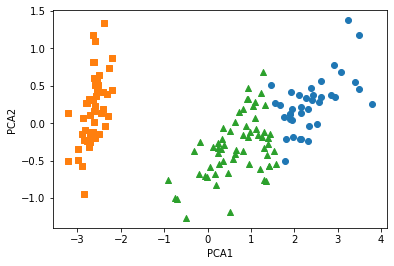

In [13]:
# cluster 값이 0,1,2에 해당하는 index로 각 cluster레벨의 pca_x, pca_y 값 추출
# o, s, ^ 로 marker 표시

# 1. cluster == 0
plt.scatter(x= iris_df.loc[cluster0_idx, 'pca_x']
           ,y= iris_df.loc[cluster0_idx, 'pca_y']
           ,marker='o')

# 2. cluster == 1
plt.scatter(x= iris_df.loc[cluster1_idx, 'pca_x']
           ,y= iris_df.loc[cluster1_idx, 'pca_y']
           ,marker='s')

# 3. cluster == 2
plt.scatter(x= iris_df.loc[cluster2_idx, 'pca_x']
           ,y= iris_df.loc[cluster2_idx, 'pca_y']
           ,marker='^')


plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

- PCA 적용 후 분류가 더 잘 되었다.

### Clustering 알고리즘 테스트를 위한 데이터 생성
- blobs : 군집화를 위한 Random 데이터 생성기

In [14]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [168]:
# 군집화에 사용되는 데이터셋 생성  : 임의로 생성 
X, y = make_blobs(
    n_samples=200   # 생성할 데이터 개수
    , n_features=2  # 피처(컬럼) 개수
    , centers=3   # 레이블 개수
    , cluster_std=0.8 # 표준 편차 ( 군집 내에서의 데이터 표준편차)
    , random_state=0
) 
print(X.shape, '원래답: ', y.shape)

(200, 2) 원래답:  (200,)


In [169]:
type(y)

numpy.ndarray

In [170]:
# 원래 답의 분포 확인
pd.Series(y).value_counts()

1    67
0    67
2    66
dtype: int64

In [171]:
# 원래 답 3개 다 확인 : Series 로 변환하지 않고 얻는 방법
labels, counts = np.unique(y, return_counts=True)   # 중복제거
print('레이블: ', labels, '개수:', counts)

레이블:  [0 1 2] 개수: [67 67 66]


In [172]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([67, 67, 66], dtype=int64))

## 10/21 여기부터~  군집화 알고리즘 테스트를 위한 데이터 생성 계속

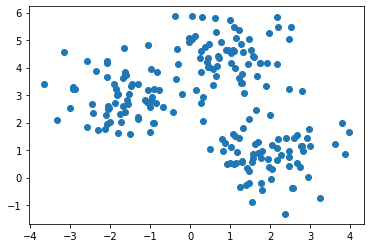

In [173]:
plt.scatter(
    x=X[:,0]
    ,y=X[:,1]
)

In [174]:
# 생성한 데이터를 데이터프레임으로 변환
import pandas as pd
cluster_df = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
cluster_df['target']=y
cluster_df.head()

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


In [175]:
target_list, count = np.unique(y, return_counts=True)
target_list, count

(array([0, 1, 2]), array([67, 67, 66], dtype=int64))

In [176]:
# 원래 답에 대한 세부 시각화

# 각 target 별로 scatter plot marker 지정
markers = ['o','s','^','P','D','H','x']

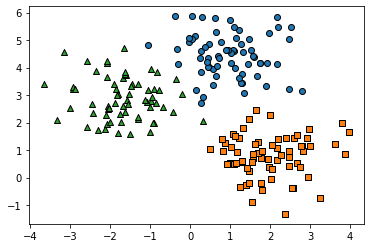

In [177]:
for target in target_list:
    # plot 할 데이터를 뽑기
    target_cluster_data = cluster_df[cluster_df['target']==target]
    plt.scatter(x=target_cluster_data['ftr1'], y=target_cluster_data['ftr2'], edgecolors='k', marker=markers[target])

In [178]:
# 중심점 좌표 위 평면에 표시
# 1. 중심점 좌표 구하기 : KMeans

# Kmeans 객체 생성
kmeans = KMeans(
      n_clusters=3  # 원래는 모르고 사용자가 임의로 추측해서 지정해야함.
    , init='k-means++'
    , max_iter=200  # 최대반복횟수
    , random_state=0
)

cluster_labels = kmeans.fit_predict(X) # labels 예측값 추출, fit(Center 까지 만들어진다.)
cluster_df['kmeans_labels']= cluster_labels

In [179]:
centers = kmeans.cluster_centers_   # 중심좌표
centers

array([[ 0.990103  ,  4.44666506],
       [ 1.95763312,  0.81041752],
       [-1.70636483,  2.92759224]])

In [180]:
unique_labels = np.unique(cluster_labels)
unique_labels

array([0, 1, 2])

## 중요한 시각화 코드들 참고

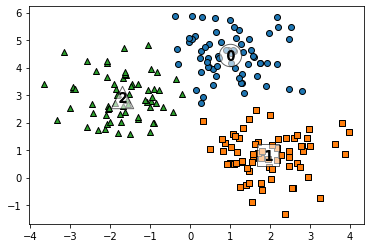

In [181]:
markers = ['o','s','^','P','D','H','x']

for label in unique_labels:
    # 데이터 추출
    label_cluster = cluster_df[cluster_df['kmeans_labels']==label]
    center_x_y = centers[label]
    # 데이터 분포 시각화
    plt.scatter(
         x=label_cluster['ftr1']
        ,y=label_cluster['ftr2']
        ,edgecolors='k'
        ,marker=markers[label]
    )
    # 군집 레이블 마커의 배경 시각화
    plt.scatter(
         x=center_x_y[0]
        ,y=center_x_y[1]
        ,color='white'
        , s=500   # 크기
        , alpha=0.6   # 투명도(0~1 사이)
        ,edgecolors='k'  # 중심좌표 색깔 검은색으로
        ,marker= markers[label]     # %label로 숫자값 들어가도록 지정하기
    )   
    
    # 중심 좌표 레이블(0,1,2) 시각화
    plt.scatter(
         x=center_x_y[0]
        ,y=center_x_y[1]
        ,color='k'
        , s=100
        ,edgecolors='k'  # 중심좌표 색깔 검은색으로
        ,marker= '$%d$' % label     # %label로 숫자값 들어가도록 지정하기
    )   


In [182]:
cluster_df

,ftr1,ftr2,target,kmeans_labels
0,-1.692427,3.622025,2,2
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0
3,-1.448724,3.384245,2,2
4,1.214861,5.364896,0,0
...,...,...,...,...
195,2.956576,0.033718,1,1
196,-2.074113,4.245523,2,2
197,2.783411,1.151438,1,1
198,1.226724,3.620511,0,0


In [183]:
# target : 원래답(0,1,2)
# 예측값 : 그룹핑 값 (0,1,2)
cluster_df.groupby('target')['kmeans_labels'].value_counts()

target  kmeans_labels
0       0                66
        2                 1
1       1                67
2       2                65
        1                 1
Name: kmeans_labels, dtype: int64

꽤 잘 분류되었다, 처음에 데이터 생성시 표준편차 지정을 크게할수록 분류 정확도는 떨어지게 된다